# WHO Suicide Analysis

Dataset: https://www.kaggle.com/szamil/who-suicide-statistics

Looking at the data, one can observe long-time trends and differences between countries, as well as within countries across a few demographic groups - in both cases you will see that these differences may be very large.  
Content - Basic aggregate numbers covering 1979-2016, by country, year, age groups and sex. There is only one file, with only a few columns.

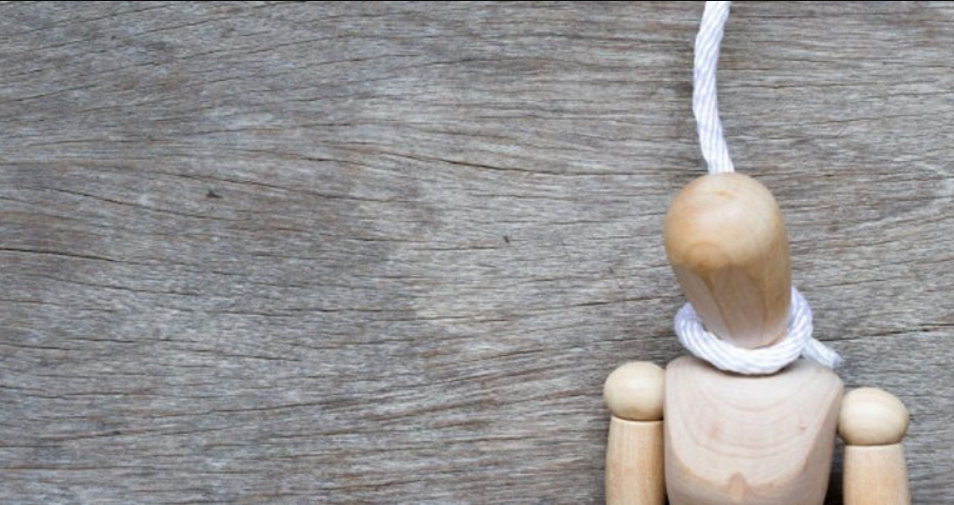

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [2]:
data = pd.read_csv('Suicide Prediction.csv')
data = data.sort_values(['year'], ascending = True)
data.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


In [3]:
print(data.shape)

(43776, 6)


In [4]:
data.head()

,country,year,sex,age,suicides_no,population
6204,Brazil,1979,female,15-24 years,385.0,12448100.0
26470,Netherlands,1979,male,55-74 years,217.0,1040500.0
26471,Netherlands,1979,male,75+ years,93.0,235800.0
2615,Austria,1979,male,75+ years,NaN,141900.0
2614,Austria,1979,male,55-74 years,NaN,573800.0


In [5]:
print("No. of Countries available for analysis :", data['country'].nunique())

No. of Countries available for analysis : 141


In [6]:
data.rename({'sex' : 'gender', 'suicides_no' : 'suicides'}, inplace = True, axis = 1)

data.columns

Index(['country', 'year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43776 entries, 6204 to 25858
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     43776 non-null  object 
 1   year        43776 non-null  int64  
 2   gender      43776 non-null  object 
 3   age         43776 non-null  object 
 4   suicides    41520 non-null  float64
 5   population  38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
data.describe()

,year,suicides,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


In [9]:
#checking the Correlation of Suicides and Population

corr = data['suicides'].corr(data['population'])
print("Correlation Between Suicides and Population : {0:.2f}".format(corr))

Correlation Between Suicides and Population : 0.61


In [10]:
data.isnull().sum()

country          0
year             0
gender           0
age              0
suicides      2256
population    5460
dtype: int64

In [11]:
#countries with more than 5000 suicides in age group 15-24 years 

x = data[(data['age'] == '15-24 years') 
     & (data['suicides'] > 5000)][['country',
                                   'suicides',
                                   'gender',
                                   'year']].sort_values(by = 'suicides', ascending = False)
x.style.background_gradient(cmap = 'Wistia')

,country,suicides,gender,year
33210,Russian Federation,6945.000000,male,2001
33222,Russian Federation,6667.000000,male,2002
33198,Russian Federation,6578.000000,male,2000
33234,Russian Federation,6134.000000,male,2003
33186,Russian Federation,6120.000000,male,1999
33246,Russian Federation,5891.000000,male,2004
33150,Russian Federation,5784.000000,male,1996
33162,Russian Federation,5780.000000,male,1997
33258,Russian Federation,5750.000000,male,2005
33138,Russian Federation,5733.000000,male,1995


In [12]:
# Top 10 Countries wrt Suicides

data[['country',
      'suicides']].groupby(['country']).agg('sum').sort_values(by = 'suicides',
                                                               ascending = False).head(10).style.background_gradient(cmap = 'Wistia')

,suicides
country,
Russian Federation,1500992.000000
United States of America,1201401.000000
Japan,937614.000000
France,395500.000000
Ukraine,365170.000000
Germany,291262.000000
Republic of Korea,261730.000000
Brazil,250824.000000
Poland,172562.000000


In [13]:
# Countries with least number of suicides

data[['country',
      'suicides']].groupby(['country']).agg('sum').sort_values(by = 'suicides',
                                                               ascending = True).head(10).style.background_gradient(cmap = 'Wistia')

,suicides
country,
Montserrat,1.000000
Falkland Islands (Malvinas),1.000000
Anguilla,2.000000
Iraq,3.000000
Sao Tome and Principe,4.000000
Saint Pierre and Miquelon,5.000000
Turks and Caicos Islands,6.000000
Mayotte,6.000000
British Virgin Islands,8.000000


In [14]:
# checking in which year highest no. of suicides are recorded

data[['suicides',
      'year']].groupby(['year']).agg('sum').sort_values(by = 'suicides',
                                                        ascending = False).head(10).style.background_gradient(cmap = 'Wistia')

,suicides
year,
2003,260429.000000
2002,260401.000000
1999,259984.000000
2000,259905.000000
2001,255071.000000
1998,253279.000000
1996,250353.000000
2009,247324.000000
1995,245915.000000


In [15]:
# checking the suicides according to gender

data[['gender','suicides']].groupby(['gender']).agg(['min','max']).style.background_gradient(cmap = 'Wistia')

In [16]:
# filling missing values

data['suicides'].fillna(0, inplace = True)

In [17]:
data['population'].mean()

1664091.1353742562

In [18]:
data['population'].fillna(1664090, inplace = True)

In [19]:
# checking if there is any null value left
data.isnull().sum()

country       0
year          0
gender        0
age           0
suicides      0
population    0
dtype: int64

In [20]:
# converting these attributes into integer format
data['suicides'] = data['suicides'].astype(int)
data['population'] = data['population'].astype(int)

# Data Visualization

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


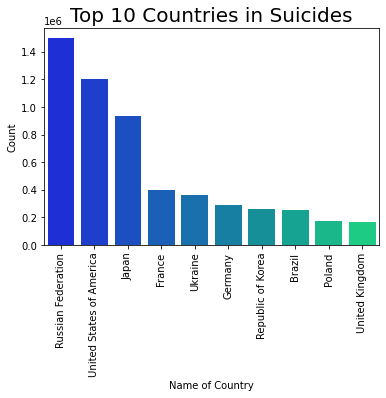

In [21]:
# visualising the different countries distribution in the dataset

x = pd.DataFrame(data.groupby(['country'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides'].head(10), data = x, palette = 'winter')
plt.title('Top 10 Countries in Suicides', fontsize = 20)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.show()

C:\Users\SAI SOWMYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


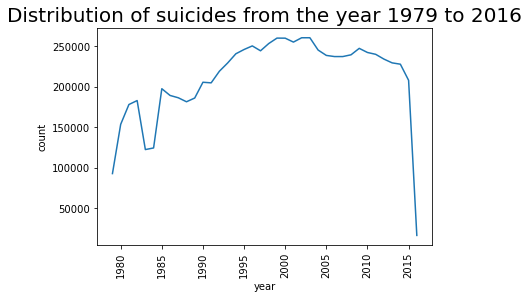

In [22]:
# visualising the different year distribution in the dataset
x = pd.DataFrame(data.groupby(['year'])['suicides'].sum().reset_index())
x.sort_values(by = ['suicides'], ascending = False, inplace = True)

sns.lineplot(x['year'], y = x['suicides'], data = x, palette = 'cool')
plt.title('Distribution of suicides from the year 1979 to 2016', fontsize = 20)
plt.xlabel('year')
plt.xticks(rotation = 90)
plt.ylabel('count')
plt.show()

In [23]:
data['age'].value_counts()

25-34 years    7296
75+ years      7296
55-74 years    7296
15-24 years    7296
35-54 years    7296
5-14 years     7296
Name: age, dtype: int64

### Finding Suicide Trends according to Year

Text(0.5, 1.0, 'Suicides Trends in Japan wrt Year')

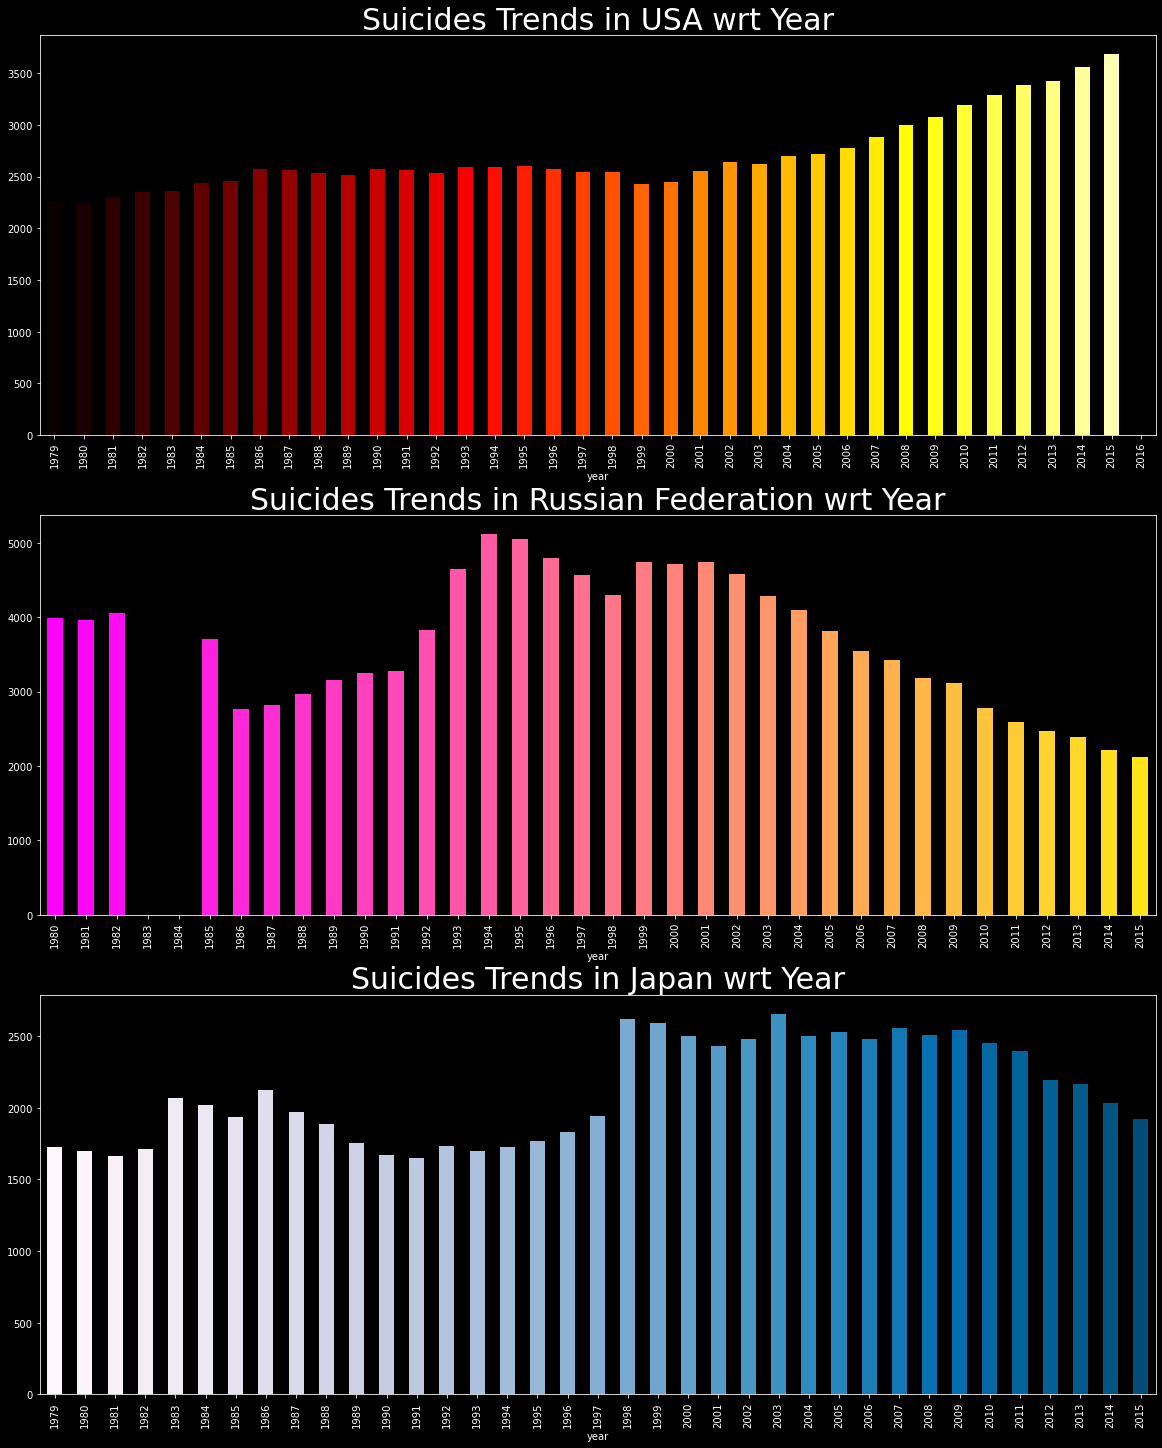

In [24]:
df = data.groupby(['country', 'year'])['suicides'].mean()
df = pd.DataFrame(df)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20,25)
plt.style.use('dark_background')


plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 40))
df['suicides']['United States of America'].plot.bar(color = color)
plt.title('Suicides Trends in USA wrt Year', fontsize = 30)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 40))
df['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Year', fontsize = 30)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 40))
df['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Year', fontsize = 30)


### Finding Suicide Trends according to Age Groups

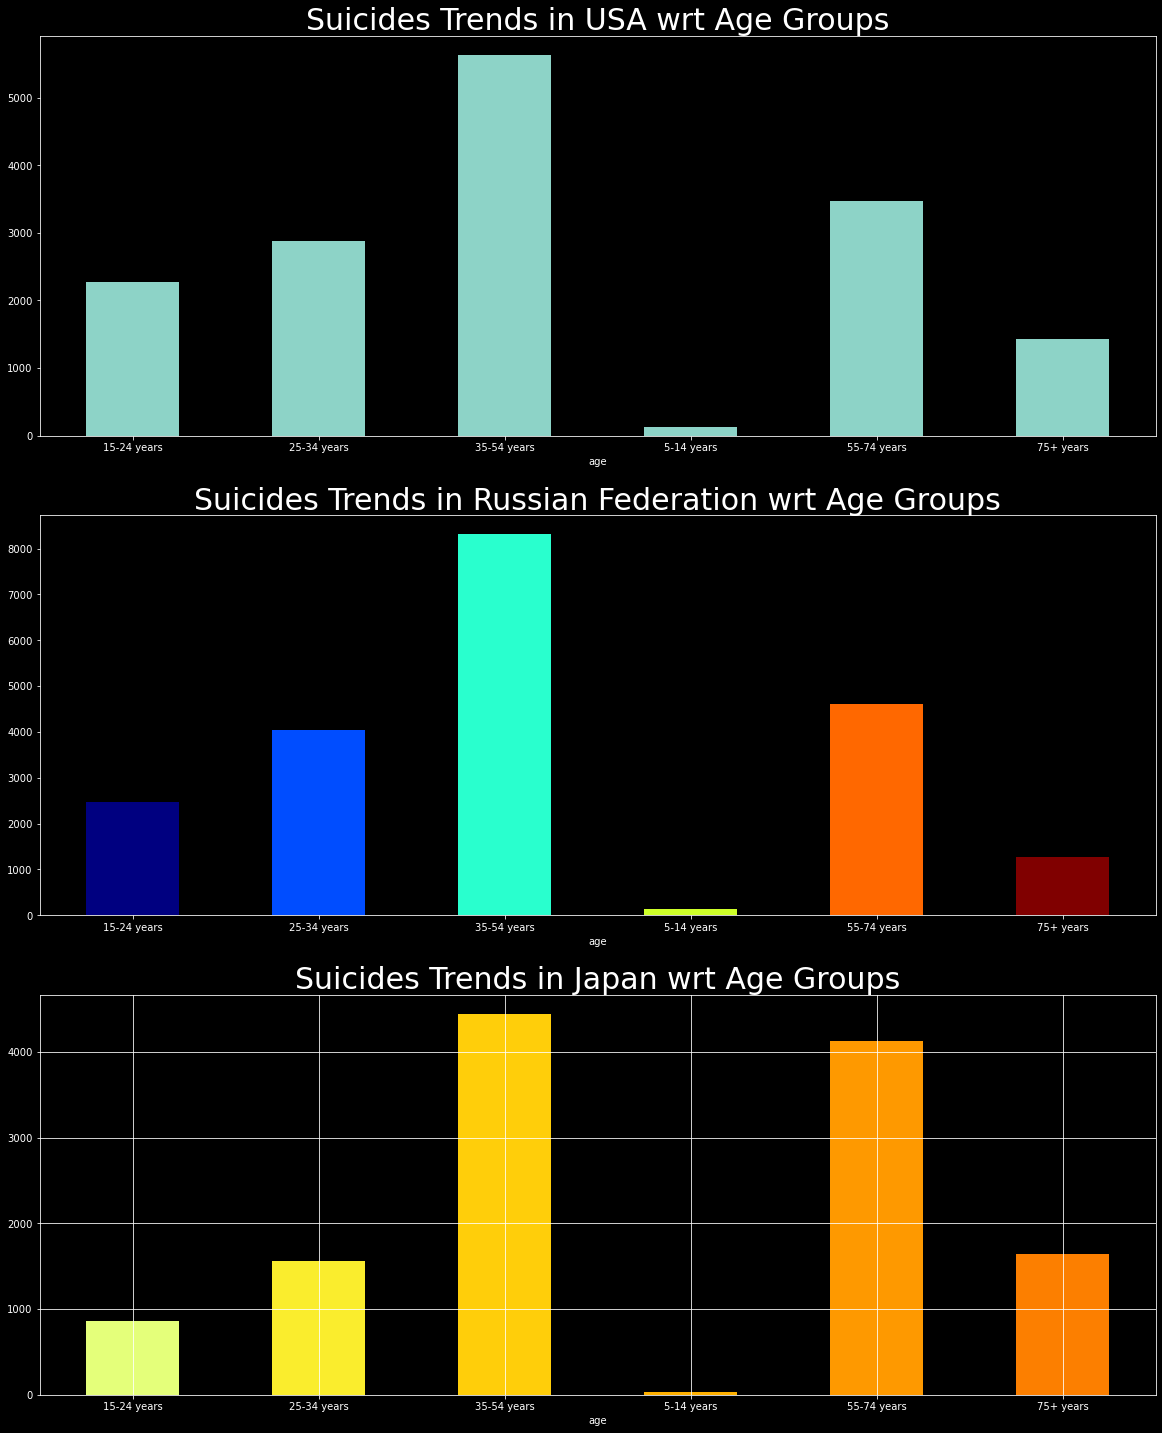

In [25]:
df2 = data.groupby(['country', 'age'])['suicides'].mean()
df2 = pd.DataFrame(df2)

# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (20, 25)

plt.subplot(3, 1, 1)
df2['suicides']['United States of America'].plot.bar()
plt.title('Suicides Trends in USA wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 2)
color = plt.cm.jet(np.linspace(0, 1, 6))
df2['suicides']['Russian Federation'].plot.bar(color = color)
plt.title('Suicides Trends in Russian Federation wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.subplot(3, 1, 3)
color = plt.cm.Wistia(np.linspace(0, 1, 6))
df2['suicides']['Japan'].plot.bar(color = color)
plt.title('Suicides Trends in Japan wrt Age Groups', fontsize = 30)
plt.xticks(rotation = 0)

plt.grid()
plt.show()

### Encoding Categorical Data

In [26]:
from sklearn.preprocessing import LabelEncoder

# creating an encoder
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])

In [27]:
# replacing categorical values in the age column

data['age'] = data['age'].replace('5-14 years', 0)
data['age'] = data['age'].replace('15-24 years', 1)
data['age'] = data['age'].replace('25-34 years', 2)
data['age'] = data['age'].replace('35-54 years', 3)
data['age'] = data['age'].replace('55-74 years', 4)
data['age'] = data['age'].replace('75+ years', 5)

data['age'].value_counts()

0    7296
1    7296
2    7296
3    7296
4    7296
5    7296
Name: age, dtype: int64

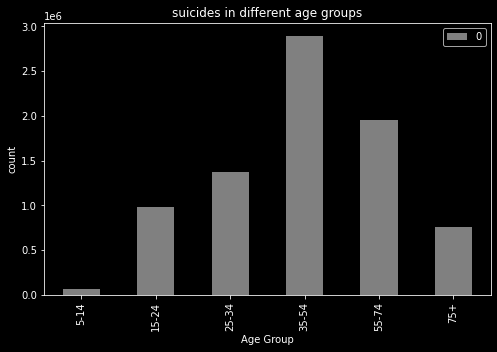

In [28]:
x1 = data[data['age'] == 0]['suicides'].sum()
x2 = data[data['age'] == 1]['suicides'].sum()
x3 = data[data['age'] == 2]['suicides'].sum()
x4 = data[data['age'] == 3]['suicides'].sum()
x5 = data[data['age'] == 4]['suicides'].sum()
x6 = data[data['age'] == 5]['suicides'].sum()
plt.rcParams['figure.figsize'] = (8,5)
x = pd.DataFrame([x1, x2, x3, x4, x5, x6])
x.index = ['5-14', '15-24', '25-34', '35-54', '55-74', '75+']
x.plot(kind = 'bar', color = 'grey')

plt.title('suicides in different age groups')
plt.xlabel('Age Group')
plt.ylabel('count')
plt.show()

In [29]:
data['age'].value_counts()

0    7296
1    7296
2    7296
3    7296
4    7296
5    7296
Name: age, dtype: int64

In [30]:
# deleting unnecassary column

data = data.drop(['country'], axis = 1)

data.columns

Index(['year', 'gender', 'age', 'suicides', 'population'], dtype='object')

In [31]:
#splitting the data into dependent and independent variables

x = data.drop(['suicides'], axis = 1)
y = data['suicides']

print(x.shape)
print(y.shape)

(43776, 4)
(43776,)


## splitting the dataset into training and testing sets

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(32832, 4)
(32832,)
(10944, 4)
(10944,)


In [33]:
# Scaling 
from sklearn.preprocessing import MinMaxScaler

# creating a scaler
mm = MinMaxScaler()

# scaling the independent variables
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

## Models to Predict Suicides

## LinearRegression

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# creating the model
model = LinearRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 361228.59026470146
RMSE : 601.0229531928888
r2_score : 0.3837302593217645


## RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

# creating the model
model = RandomForestRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 79569.807830523
RMSE : 282.08120786490366
r2_score : 0.8642508755976362


## DecisionTreeRegressor

In [36]:
from sklearn.tree import DecisionTreeRegressor

# creating the model
model = DecisionTreeRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 152132.3971769343
RMSE : 390.04153263073704
r2_score : 0.740456332960007


## AdaBoostRegressor

In [37]:
from sklearn.ensemble import AdaBoostRegressor

# creating the model
model = AdaBoostRegressor()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2)
print("MSE :", mse)

# calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

#calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2_score :", r2)

MSE : 280353.87045956793
RMSE : 529.4845327859615
r2_score : 0.5217056132803666


## Comparing the Results
R2 Score for all four Models (model with higher r2 score is better)

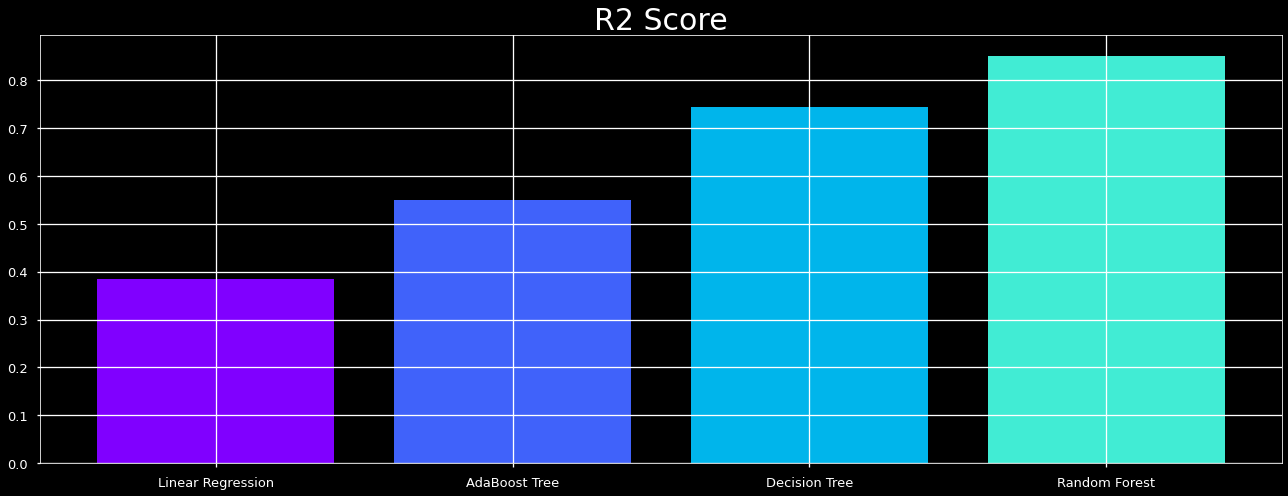

In [38]:
r2_score = np.array([0.385, 0.851, 0.745, 0.55])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('R2 Score', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()


RMSE for all four Models(model with lower RMSE is better)

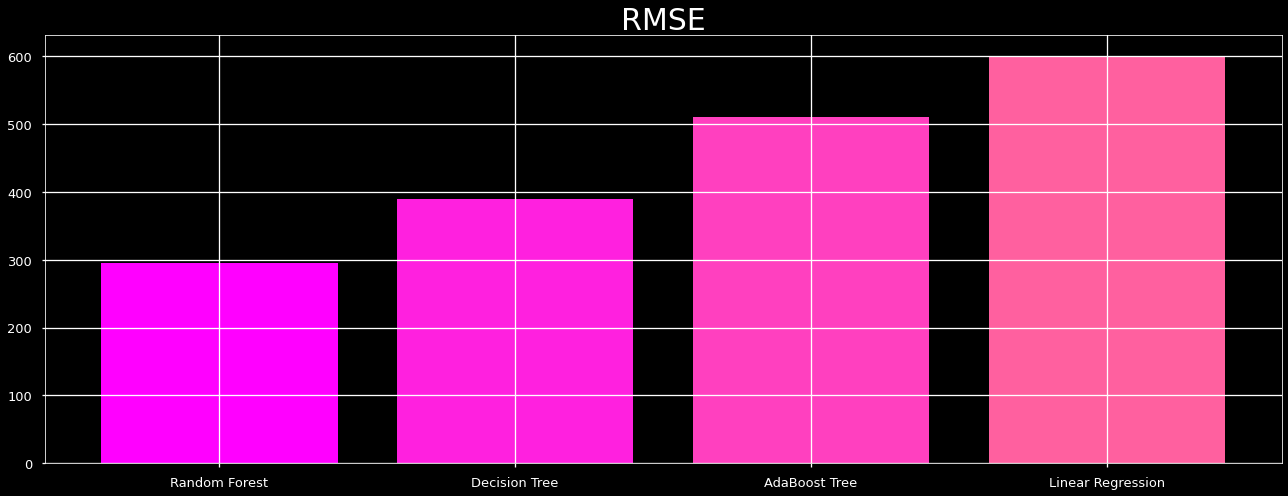

In [39]:
rmse = np.array([601, 296, 389, 511])
labels = np.array(['Linear Regression', 'Random Forest', 'Decision Tree', 'AdaBoost Tree'])
indices = np.argsort(rmse)
color = plt.cm.spring(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (18, 7)

plt.bar(range(len(indices)), rmse[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
plt.title('RMSE', fontsize = 30)

plt.grid()
plt.tight_layout()
plt.show()

Random Forest Model is giving the good results. Hence we can choose Random Forest Model for predictions